In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Connect to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

# Load Dataset

In [54]:
train_dir = '/content/drive/MyDrive/dataset'

# melihat jumlah kelas
import os
os.listdir((train_dir))

['Apricot',
 'Avocado',
 'Banana',
 'Blueberry',
 'Corn',
 'Guava',
 'Kiwi',
 'Lemon',
 'Limes',
 'Lychee',
 'Mango',
 'Orange',
 'Papaya',
 'Peach',
 'Pear',
 'Pineapple',
 'Rambutan',
 'Raspberry',
 'Salak',
 'Strawberry',
 'Watermelon']

In [55]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    zoom_range=0.2,
    validation_split=0.2) # sesuai kriteria yang diminta (20%)

In [56]:
# persiapan pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training') # ambil training
 
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # ambil valid

Found 8103 images belonging to 21 classes.
Found 2020 images belonging to 21 classes.


# Build Model

In [65]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>.92 and logs.get('val_accuracy')>.92):
      print("\nAkurasi lebih dari 92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [66]:
# pembuatan model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(21, activation='softmax')  
])

In [67]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
# proses pelatihan atau pembelajaran pada model
history = model.fit(
    train_generator,
    batch_size=128,
    steps_per_epoch=10,
    epochs=100,
    validation_data=validation_generator,
    validation_batch_size=64,
    callbacks=[callbacks])

Epoch 1/100
10/10 [==============================] - 157s 3s/step - loss: 3.1437 - accuracy: 0.0508 - val_loss: 3.0251 - val_accuracy: 0.1767
Epoch 2/100
10/10 [==============================] - 25s 3s/step - loss: 2.9553 - accuracy: 0.1500 - val_loss: 2.9384 - val_accuracy: 0.1584
Epoch 3/100
10/10 [==============================] - 23s 2s/step - loss: 2.7415 - accuracy: 0.1719 - val_loss: 2.6069 - val_accuracy: 0.3302
Epoch 4/100
10/10 [==============================] - 24s 2s/step - loss: 2.2514 - accuracy: 0.3125 - val_loss: 2.0902 - val_accuracy: 0.3005
Epoch 5/100
10/10 [==============================] - 24s 2s/step - loss: 1.7457 - accuracy: 0.4344 - val_loss: 1.6030 - val_accuracy: 0.4985
Epoch 6/100
10/10 [==============================] - 23s 2s/step - loss: 1.3314 - accuracy: 0.5594 - val_loss: 1.4103 - val_accuracy: 0.4901
Epoch 7/100
10/10 [==============================] - 21s 2s/step - loss: 1.2030 - accuracy: 0.5531 - val_loss: 1.0781 - val_accuracy: 0.6059
Epoch 8/100


# Plot Loss & Accuracy

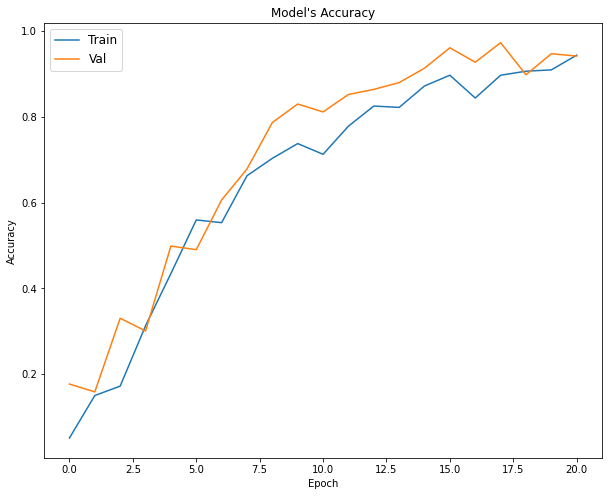

In [69]:
# visualisasi dari akurasi pelatihan
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model\'s Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], fontsize=12)
plt.show()

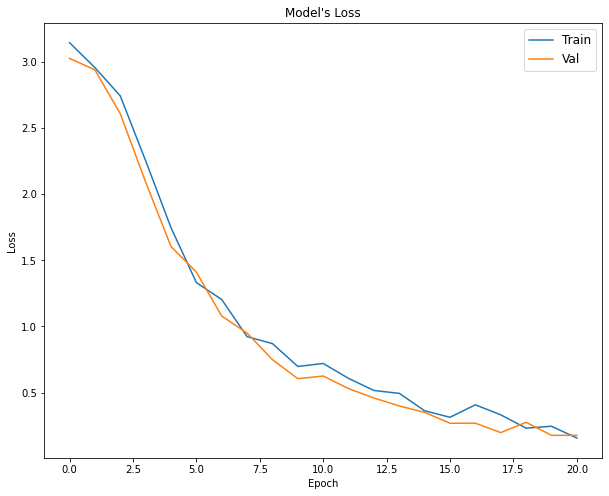

In [70]:
# visualisasi dari loss pelatihan
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model\'s Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], fontsize=12)
plt.show()

# TF-Lite

In [71]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpy9eypjce/assets


In [72]:
# menyimpan tflite model
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)